Import

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import random
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
diamond = pd.read_csv(os.path.join(dirname, filename),index_col = 'Unnamed: 0')

In [ ]:
diamond.head(5)

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
diamond.shape

(53940, 10)

Check if there are missing values

In [ ]:
# Missing values
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamond.duplicated().sum()

146

In [ ]:
diamond = diamond.loc[~diamond.duplicated(),:]

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
diamond.describe()

carat         depth         table         price             x  \
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.79778     61.748080     57.458109   3933.065082      5.731214   
std        0.47339      1.429909      2.233679   3988.114460      1.120695   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    951.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000     62.500000     59.000000   5326.750000      6.540000   
max        5.01000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.734653      3.538714  
std        1.141209      0.705037  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

 we note that there are some rows with x,y,z = 0 
 it's technically not possible we display and drop this row

In [ ]:
zero_values = (diamond.loc[:,'x'] == 0) | (diamond.loc[:,'y'] == 0)| (diamond.loc[:,'z'] == 0)
zero_values.sum()

19

In [ ]:
diamond = diamond.loc[~zero_values]

In [ ]:

fig = px.histogram(diamond, x="price",
                   hover_data=diamond.columns,)
fig.show()

In [ ]:
fig = px.histogram(diamond, x="carat",
                   hover_data=diamond.columns)
fig.show()

<Figure size 1440x432 with 0 Axes>

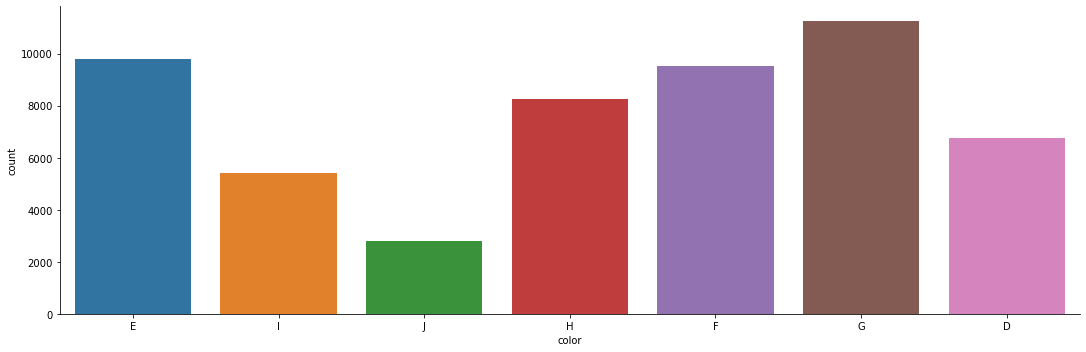

In [ ]:
plt.figure(figsize = (20,6))


sns.factorplot(x='color', data=diamond , kind='count',aspect=3)



plt.show()

<Figure size 864x432 with 0 Axes>

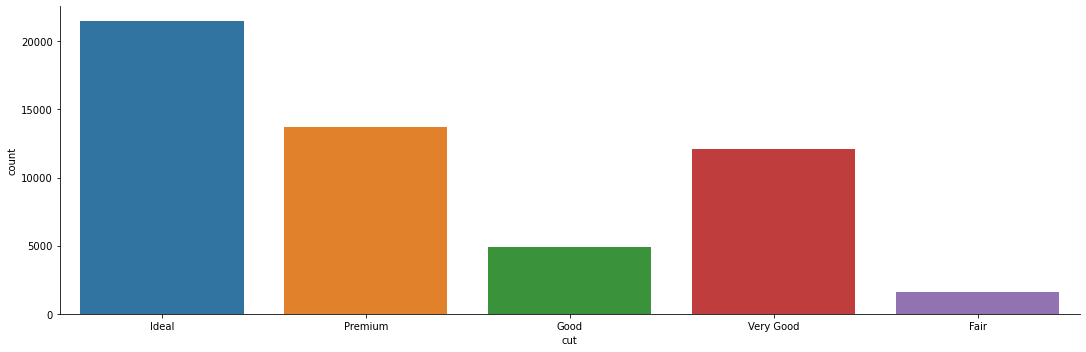

In [ ]:
plt.figure(figsize = (12,6))

sns.factorplot(x='cut', data=diamond , kind='count',aspect=3)
 
plt.show()

<Figure size 864x432 with 0 Axes>

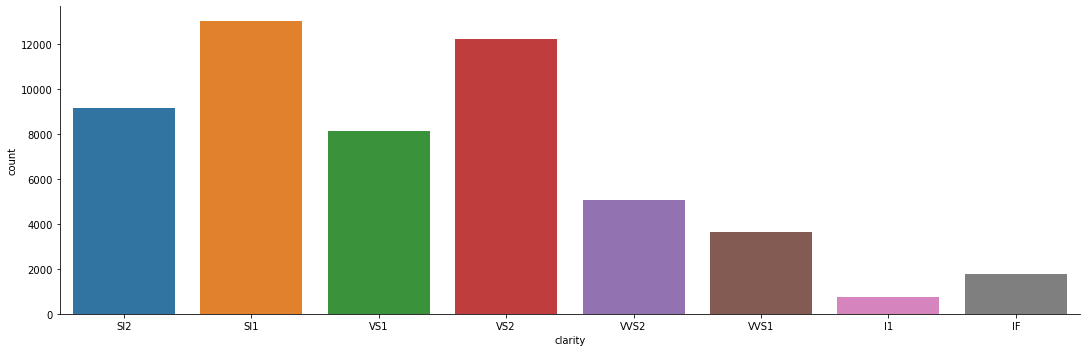

In [ ]:
plt.figure(figsize = (12,6))

sns.factorplot(x='clarity', data=diamond , kind='count',aspect=3)
 
plt.show()

In [ ]:
lst_features = list(diamond.columns)
drop_f = ['price','cut','color','clarity']

for index in drop_f:
  lst_features.remove(index)

fig = go.Figure()

for feature in lst_features:

   fig.add_trace(go.Box(y=diamond.loc[:,feature],name = feature))


fig.show()

Diamonds with color D are most common for character sizes <1.3
D colors are rare so it is normal to find only a few stone with this color for large stones
we can see that the price depends on the weight of the stone (carat)
Larger diamonds> 2 carat are usually medium H, J colors

In [ ]:
fig = px.scatter(diamond, x="carat", y="price",color = 'color')
fig.show()


we can see that the cheapest diamonds are those with a low clarity (I1)
we see that some diamonds with very high clarity (IF) even being light 1 carat are worth in the 20k dollars
high quality diamonds> 2.5 carats are diamonds with low clarity

In [ ]:
fig = px.scatter(diamond, x="carat", y="price",color = 'clarity')
fig.show()

In [ ]:
fig = px.box(diamond, x="cut", y="price",color = 'color')
fig.show()

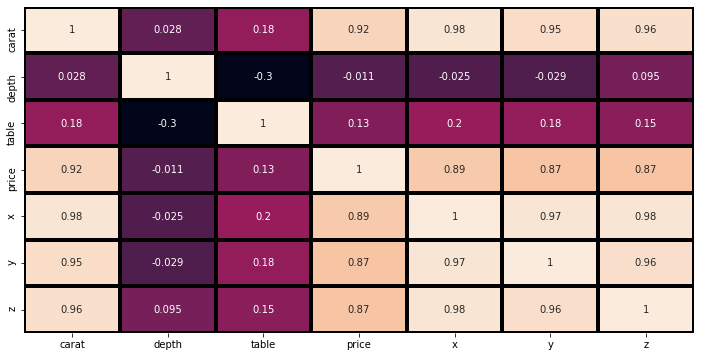

In [ ]:
plt.figure(figsize = (12,6))

sns.heatmap(diamond.corr(),annot = True,linewidths=3,linecolor='black',cbar = False)

plt.show()

In [ ]:
diamond = pd.get_dummies(data = diamond,drop_first = True)

In [ ]:
diamond.head()

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
1   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
2   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   
3   0.23   56.9   65.0    327  4.05  4.07  2.31         1          0   
4   0.29   62.4   58.0    334  4.20  4.23  2.63         0          0   
5   0.31   63.3   58.0    335  4.34  4.35  2.75         1          0   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
1            0  ...        0        0        0           0            0   
2            1  ...        0        0        0           0            1   
3            0  ...        0        0        0           0            0   
4            1  ...        0        1        0           0            0   
5            0  ...        0        0        1           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
1            1            0            0             0             0  
2            0            0            0             0             0  
3            0            1            0             0             0  
4            0            0            1             0             0  
5            1            0            0             0             0  

[5 rows x 24 columns]

Scaling of data , We fit_transform the train and just transform the test to avoid data linkage

In [ ]:
X = diamond.drop('price',axis = 1)
y = diamond.loc[:,'price']
X_train,X_test, y_train ,y_test = train_test_split(X,y,test_size = .2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.loc[:,['carat','depth','table','x','y','z']]),columns = ['carat','depth','table','x','y','z'],index = X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.loc[:,['carat','depth','table','x','y','z']]),columns = ['carat','depth','table','x','y','z'], index = X_test.index)

X_train_scale_final = X_train.copy()
X_test_scale_final = X_test.copy()

X_train_scale_final.loc[:,['carat','depth','table','x','y','z']] = X_train_scaled.loc[:,['carat','depth','table','x','y','z']]
X_test_scale_final.loc[:,['carat','depth','table','x','y','z']] = X_test_scaled.loc[:,['carat','depth','table','x','y','z']]

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scale_final,y_train)
y_pred = lr.predict(X_test_scale_final)

mse = (mean_squared_error(y_test,y_pred)) 

rmse = mse**.5
rmse

1128.911079875183

RMSE means that on average we are wrong by 1128 dollars

In [ ]:
model = Sequential()

model.add(Dense(256,activation='relu',input_dim= X_train_scale_final.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 47,361
Trainable params: 47,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'mse')

In [2]:
model.fit(x = X_train_scale_final,y = y_train,validation_data=(X_test_scale_final,y_test),epochs = 200,batch_size=512)

NameError: ignored

In [ ]:
y_pred = model.predict(X_test_scale_final)

In [ ]:
mean_squared_error(y_test,y_pred) ** 0.5

536.457333603543

RMSE means that on average we are wrong by 534 dollars so it's a good performance 